In [4]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')  # Importante: encoding='bytes' para Python 3
    return dict

# Vamos a la ruta donde están los datos
from pathlib import Path
path = Path("../datos/cifar-10-batches-py")

# Cargamos un batch de datos
batch_file = os.path.join(path, "data_batch_1")
data_dict = unpickle(batch_file)

In [6]:
print(data_dict.keys())

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [7]:
# Extraer una imagen y su etiqueta
img_flat = data_dict[b'data'][0]
label = data_dict[b'labels'][0]

In [8]:
meta_file = os.path.join(path, "batches.meta")
meta_dict = unpickle(meta_file)
label_names = [label.decode('utf-8') for label in meta_dict[b'label_names']]
print(label_names[label])  # Nombre de la clase de la imagen mostrada

frog


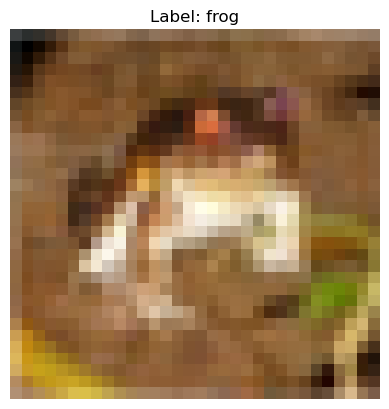

In [ ]:
# Convertir a imagen 32x32x3
img_R = img_flat[0:1024].reshape(32, 32)
img_G = img_flat[1024:2048].reshape(32, 32)
img_B = img_flat[2048:].reshape(32, 32)
img = np.stack([img_R, img_G, img_B], axis=2)

# Mostrar la imagen
plt.imshow(img.astype(np.uint8))
plt.title(f"Label: {label_names[label]}")
plt.axis('off')
plt.savefig("frog.svg", format="svg")
plt.show()

In [ ]:
from numpy.linalg import svd

# Realiza SVD en cada canal de color
U_r, S_r, Vt_r = svd(img_R, full_matrices=False)
U_g, S_g, Vt_g = svd(img_G, full_matrices=False)
U_b, S_b, Vt_b = svd(img_B, full_matrices=False)


SVD realizada en cada canal de color.


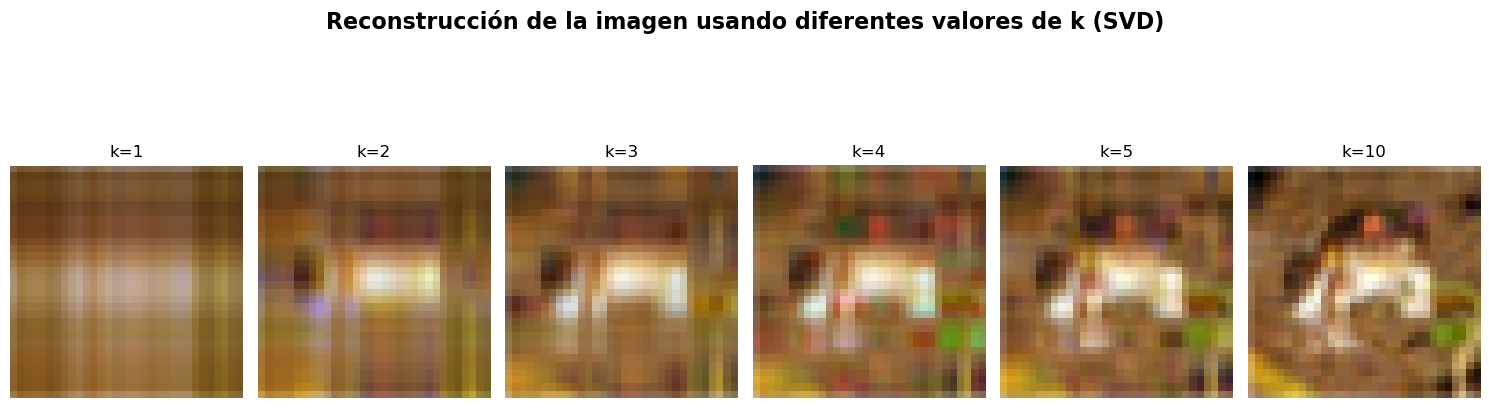

In [20]:
k_values = [1, 2, 3, 4, 5, 10]
plt.figure(figsize=(15, 5))

for i, k in enumerate(k_values, 1):
    R = (U_r[:, :k] @ np.diag(S_r[:k]) @ Vt_r[:k, :])
    G = (U_g[:, :k] @ np.diag(S_g[:k]) @ Vt_g[:k, :])
    B = (U_b[:, :k] @ np.diag(S_b[:k]) @ Vt_b[:k, :])
    img_recon = np.stack([R, G, B], axis=2)
    img_recon = np.clip(img_recon, 0, 255).astype(np.uint8)
    
    plt.subplot(1, len(k_values), i)
    plt.imshow(img_recon)
    plt.title(f'k={k}')
    plt.axis('off')

plt.suptitle('Reconstrucción de la imagen usando diferentes valores de k (SVD)', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("frog_svd_reconstruction.svg", format="svg")
plt.show()


# **LO MIMSO CON LA CARPETA SCRIPTS**

In [1]:
from scripts.cargar_datos_cifar import *

In [5]:
clases = ['bird', 'automobile', 'cat', 'deer']

In [6]:
X, y, fine_label_names, data_dict, meta_dict = clases_cifar(path, clases)

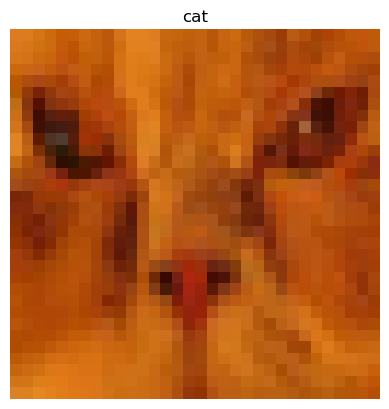

In [11]:
i_want_to_see_a_('cat', data_dict, meta_dict)

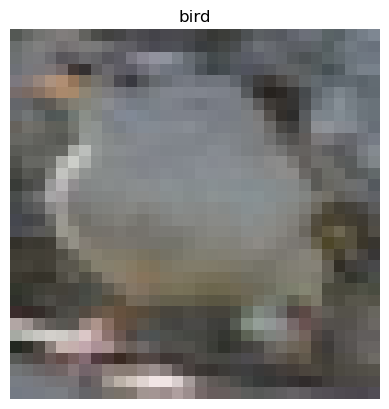

In [19]:
i_want_to_see_a_('bird', data_dict, meta_dict)

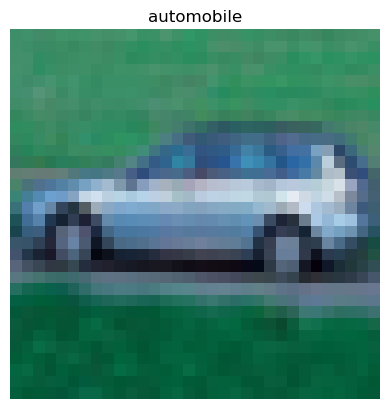

In [34]:
i_want_to_see_a_('automobile', data_dict, meta_dict)

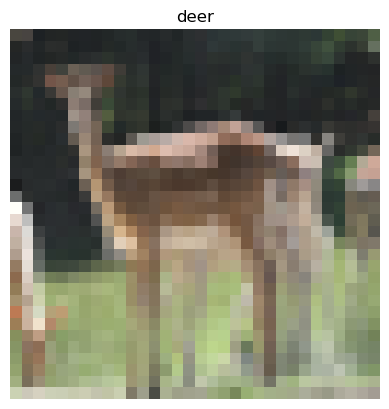

In [54]:
i_want_to_see_a_('deer', data_dict, meta_dict)